In [5]:
from ROOT import TLorentzVector
import uproot
%run ../../src/kinematicsPlotter.ipynb
PROJECT_NAME="pipluspi0_prelim"
MLmethod="catboost"
input_dir = "/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/ML/projects/"+PROJECT_NAME+"/"+MLmethod+"/postprocess/"

In [88]:
_,_,_,_,mc_in,mc_out=get_tchains(input_dir,"dihadron",5)

In [40]:
M=[]
for i,iev in enumerate(mc_in):
    pid = np.array(iev.pid,dtype=float)
    truepid = np.array(iev.truepid,dtype=float)
    trueparent_pid = np.array(iev.MCmatch_parent_pid,dtype=float)
    trueparent_id = np.array(iev.MCmatch_parent_id,dtype=float)
    px  = np.array(iev.px,dtype=float)
    py  = np.array(iev.py,dtype=float)
    pz  = np.array(iev.pz,dtype=float)
    e   = np.array(iev.E,dtype=float)
    
    for j in range(len(pid)):
        if(pid[j]!=22):
            continue
        pho1_fourvector = TLorentzVector()
        pho1_fourvector.SetPxPyPzE(px[j], py[j], pz[j], e[j])
        for k in range(j+1,len(pid)):
            if(pid[k]!=22):
                continue
            pho2_fourvector = TLorentzVector()
            pho2_fourvector.SetPxPyPzE(px[k], py[k], pz[k], e[k])
            M.append((pho1_fourvector+pho2_fourvector).M())

AttributeError: 'TChain' object has no attribute 'pid'

In [89]:
c=ROOT.TCanvas("c","c",500,500)
xmin,xmax,xbins=0.04,0.3,100
h0=ROOT.TH1F("h0",";M_{#gamma#gamma}[GeV];",xbins,xmin,xmax) 
h1=ROOT.TH1F("h1",";M_{#gamma#gamma}[GeV];",xbins,xmin,xmax) 
h2=ROOT.TH1F("h2",";M_{#gamma#gamma}[GeV];",xbins,xmin,xmax) 
h3=ROOT.TH1F("h3",";M_{#gamma#gamma}[GeV];",xbins,xmin,xmax) 
h4=ROOT.TH1F("h4",";M_{#gamma#gamma}[GeV];",xbins,xmin,xmax) 
mc_in.Draw("Mgg>>h0","","goff")
mc_in.Draw("Mgg>>h1","truePi0==1","goff")
mc_in.Draw("Mgg>>h2","(truePi0==0)&&(trueparentpid_gamma1==111&&trueparentpid_gamma2==111)","goff")
mc_in.Draw("Mgg>>h3","(trueparentpid_gamma1==111&&trueparentpid_gamma2!=111)||((trueparentpid_gamma1!=111&&trueparentpid_gamma2==111))","goff")
mc_in.Draw("Mgg>>h4","(trueparentpid_gamma1!=111&&trueparentpid_gamma2!=111)","goff")

1304904

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h4 (Potential memory leak).


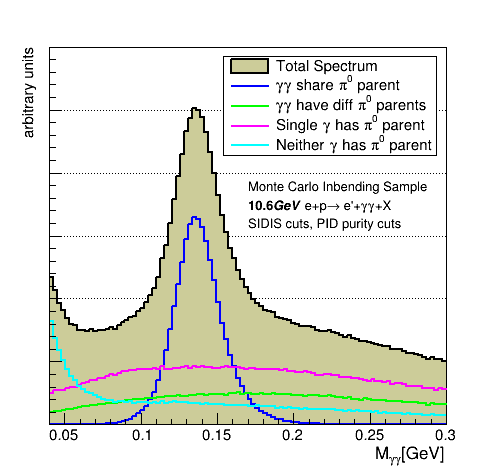

In [96]:

ROOT.gStyle.SetHistLineWidth(2)
h0.SetLineColor(1)
h0.SetFillColor(ROOT.kYellow-8)
h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kGreen)
h3.SetLineColor(ROOT.kMagenta)
h4.SetLineColor(ROOT.kCyan)

# Normalize the histograms
h1.Scale(1/h0.Integral())
h2.Scale(1/h0.Integral())
h3.Scale(1/h0.Integral())
h4.Scale(1/h0.Integral())
h0.Scale(1/h0.Integral())


h0.Draw("hist")
h1.Draw("hist same")
h2.Draw("hist same")
h3.Draw("hist same")
h4.Draw("hist same")
h0.GetYaxis().SetRangeUser(0,0.03)
h0.GetYaxis().SetNdivisions(508)
h0.GetYaxis().SetLabelSize(0)
h0.GetYaxis().SetTitle("arbitrary units")
h0.GetXaxis().SetTitleSize(0.04)
ROOT.gStyle.SetOptStat(0)
c.SetGridy(1)
c.RedrawAxis()
legend=ROOT.TLegend(0.45,0.67,0.88,0.88)
legend.AddEntry(h0,"Total Spectrum","f")
legend.AddEntry(h1,"#gamma#gamma share #pi^{0} parent","l")
legend.AddEntry(h2,"#gamma#gamma have diff #pi^{0} parents","l")
legend.AddEntry(h3,"Single #gamma has #pi^{0} parent","l")
legend.AddEntry(h4,"Neither #gamma has #pi^{0} parent","l")
legend.SetTextFont(42)
legend.Draw("same")

latex=ROOT.TLatex()
latex.SetTextSize(0.03)
latex.SetTextFont(42)
latex.DrawLatexNDC(0.5,0.595,"Monte Carlo Inbending Sample")
latex.DrawLatexNDC(0.5,0.555,"#bf{10.6#it{GeV}} e+p#rightarrow e'+#gamma#gamma+X")
latex.DrawLatexNDC(0.5,0.515,"SIDIS cuts, PID purity cuts")
c.Draw()